In [ ]:
using BlochSpins
using StaticArrays
using CairoMakie
CairoMakie.activate!()
fig, ax = init_figure()
function init_figure()
    fig = Figure(size = (800, 800))
    ax = LScene(fig[1, 1], show_axis = false)
    return fig, ax
end
function visualize_bloch_sphere!(fig, ax)
    # draw sphere
    mesh!(ax, Sphere(Point3f(0), 1f0), color = (:skyblue, 0.15), transparency = true)
    # draw wireframe
    wireframe!(ax, Sphere(Point3f(0), 1f0), color = (:black, 0.1), linewidth = 0.5)
end
function visualize_axis!(fig, ax)
    # (X, Y, Z) axes
    lines!(ax, [-1, 1], [0, 0], [0, 0], color = :red)
    lines!(ax, [0, 0], [-1, 1], [0, 0], color = :green)
    lines!(ax, [0, 0], [0, 0], [-1, 1], color = :blue)
    # axis labels
    text!(ax, "X", position = Point3f(1.1, 0, 0), color = :red)
    text!(ax, "Y", position = Point3f(0, 1.1, 0), color = :green)
    text!(ax, "Z", position = Point3f(0, 0, 1.1), color = :blue)
end
function visualize_vector(vec)
    b_vec = real.(vec)
    arrows3d!(ax, [Point3f(0)], [Point3f(b_vec...)], 
        tipradius = 0.05, 
        tiplength = 0.1, 
        shaftradius = 0.01, 
        
        diffuse = 0.8, 
        color = :black,
        transparency = true
    )
end

fig, ax = init_figure()
visualize_bloch_sphere!(fig, ax)
visualize_axis!(fig, ax)
visualize_vector(bloch_vector(k_plus))
display(fig)


[ Info: Precompiling BlochSpins [256207cc-4c09-4d5f-9b7b-1beb86bf7525] (cache misses: include_dependency fsize change (2), mismatched flags (18))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


In [2]:
function bloch_vector(k::Ket)
    x = expect(σx, k)
    y = expect(σy, k)
    z = expect(σz, k)
    return SVector(x, y, z)
end

up = SVector(1.0, 0.0)
dn = SVector(0.0, 1.0)

bloch_vector(Ket(up))  # should be SVector(0.0, 0.0, 1.0)
# bloch_vector(Ket(dn))  # should be SVector(0.0, 0.0, -1.0)


3-element SVector{3, ComplexF64} with indices SOneTo(3):
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

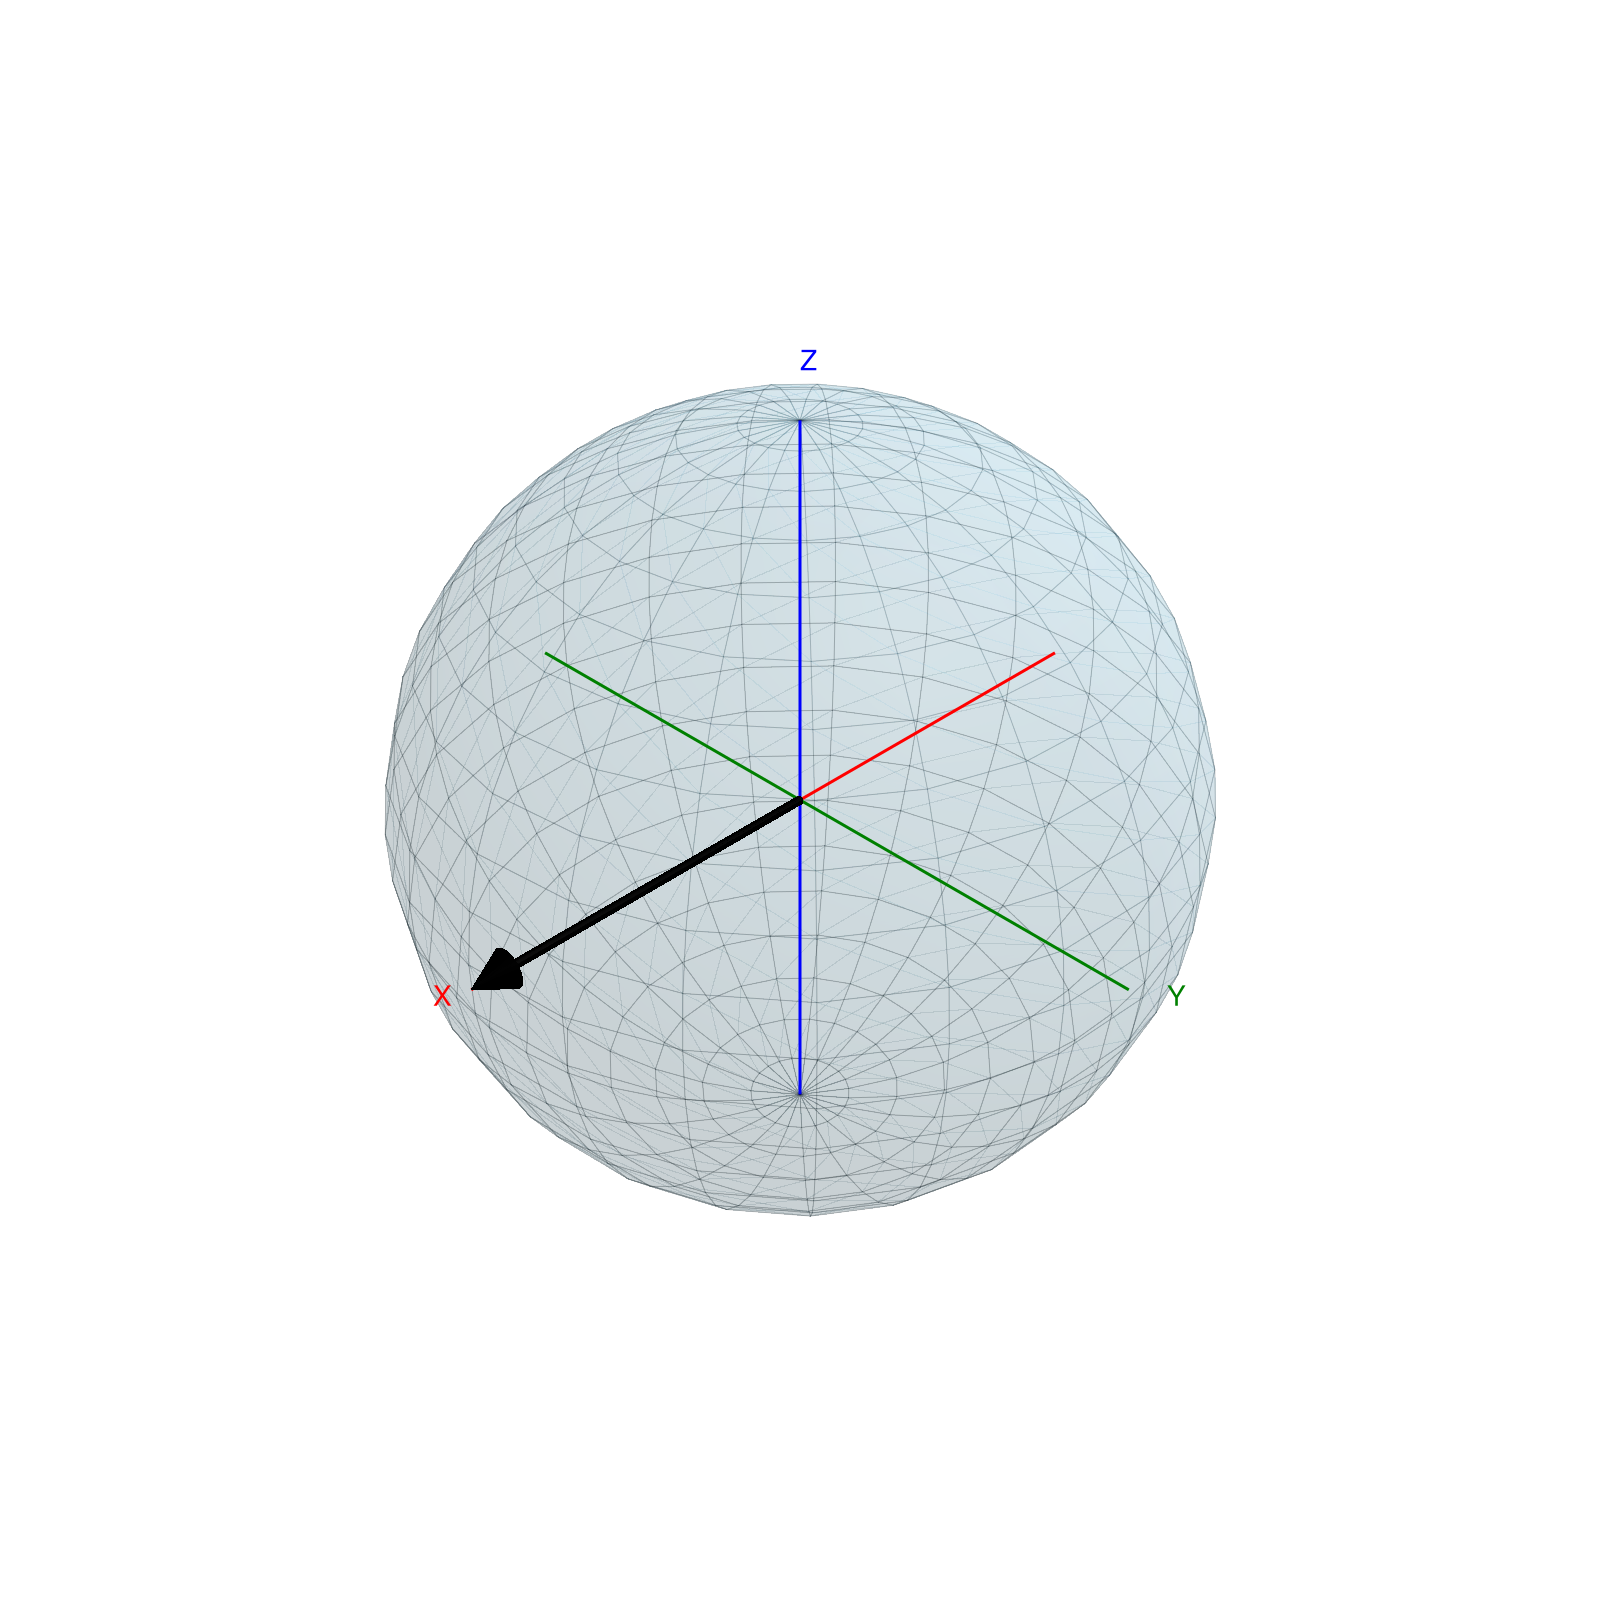

CairoMakie.Screen{IMAGE}


In [3]:
using BlochSpins
using StaticArrays

function bloch_vector(k::Ket)
    x = expect(σx, k)
    y = expect(σy, k)
    z = expect(σz, k)
    return SVector(x, y, z)
end

using CairoMakie
CairoMakie.activate!()

fig, ax = init_figure()
visualize_bloch_sphere!(fig, ax)
visualize_axis!(fig, ax)
visualize_vector!(fig, ax, bloch_vector(k_plus))
display(fig)
